### Data Dictionary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

from pycaret.classification import *

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("cell_samples.csv")

In [3]:
df

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clump        699 non-null    int64 
 1   UnifSize     699 non-null    int64 
 2   UnifShape    699 non-null    int64 
 3   MargAdh      699 non-null    int64 
 4   SingEpiSize  699 non-null    int64 
 5   BareNuc      699 non-null    object
 6   BlandChrom   699 non-null    int64 
 7   NormNucl     699 non-null    int64 
 8   Mit          699 non-null    int64 
 9   Class        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [5]:
df.describe(include='all')

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [6]:
df.shape

(699, 10)

In [7]:
df.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [8]:
df['Class'].replace(to_replace=2,value=0,inplace=True)

In [9]:
df['Class'].replace(to_replace=4,value=1,inplace=True)

In [10]:
df

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


### Data Visualization

### Univariate Data Exploration

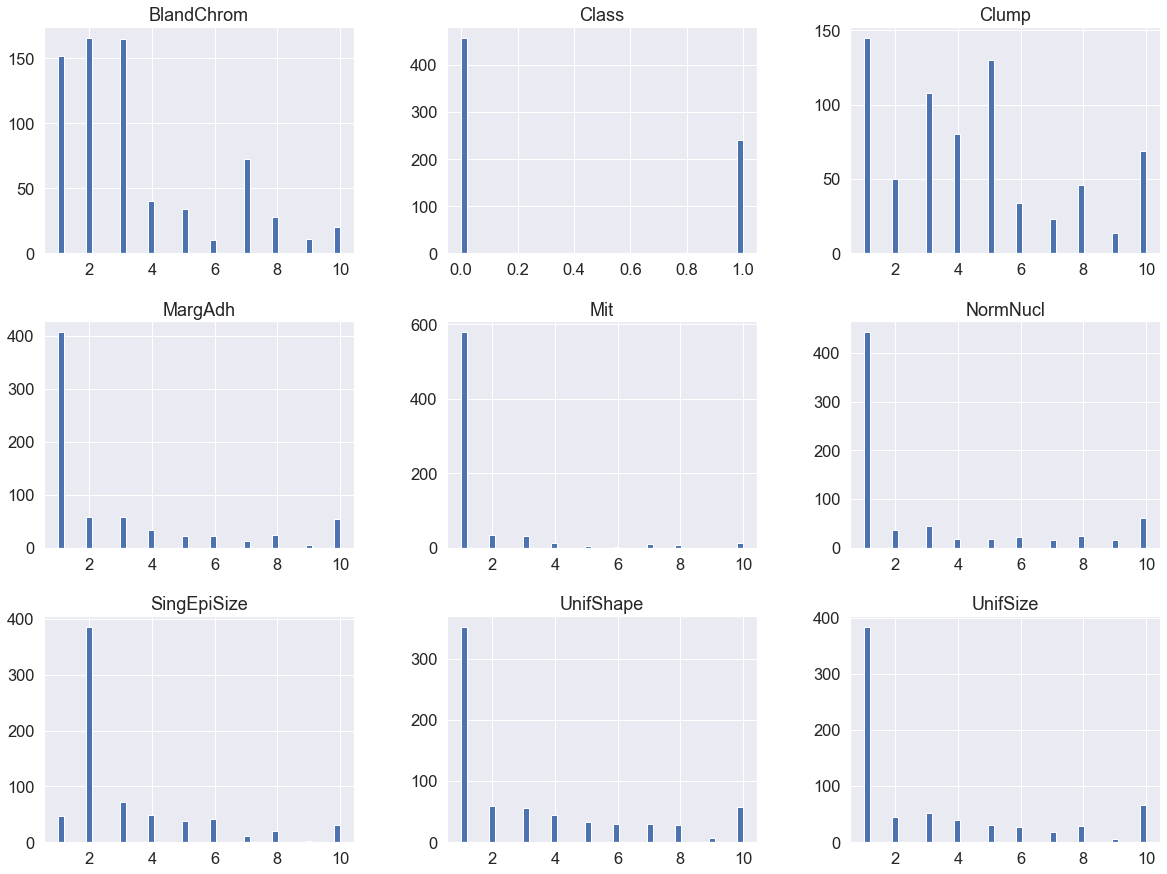

In [11]:
df.hist(bins=50, figsize=(20,15))

plt.show()

### Using Pycaret

In [12]:
exp_cat = setup(data = df, target = 'Class', session_id=123, normalize=True, normalize_method='minmax') 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(699, 10)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [13]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.979500,0.996700,0.970200,0.971200,0.970400,0.954800
1,Logistic Regression,0.977600,0.994700,0.970600,0.965700,0.967500,0.950400
2,Extra Trees Classifier,0.975500,0.995800,0.970200,0.960300,0.964600,0.945900
3,Light Gradient Boosting Machine,0.975500,0.995400,0.970600,0.960400,0.965000,0.946200
4,Extreme Gradient Boosting,0.971400,0.996000,0.964300,0.954800,0.958800,0.936900
5,Ridge Classifier,0.969400,0.000000,0.952900,0.960100,0.955800,0.932400
6,K Neighbors Classifier,0.969300,0.990600,0.934900,0.976800,0.954100,0.931200
7,Naive Bayes,0.967300,0.979100,0.964300,0.945300,0.953500,0.928300
8,SVM - Linear Kernel,0.965300,0.000000,0.947100,0.953400,0.949500,0.923100
9,Quadratic Discriminant Analysis,0.965300,0.973600,0.988200,0.922900,0.952900,0.925600


In [14]:
cat = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9796,1.0000,0.9412,1.0000,0.9697,0.9543
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9796,0.9982,1.0000,0.9444,0.9714,0.9556
4,0.9592,0.9945,0.9412,0.9412,0.9412,0.9099
5,0.9592,0.9963,0.9412,0.9412,0.9412,0.9099
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9592,0.9835,0.9412,0.9412,0.9412,0.9099
8,0.9796,0.9945,1.0000,0.9444,0.9714,0.9556
9,0.9792,1.0000,0.9375,1.0000,0.9677,0.9524


In [15]:
print(cat)

In [16]:
tuned_cat = tune_model('catboost', optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9592,1.0000,0.8824,1.0000,0.9375,0.9074
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9592,0.9982,0.9412,0.9412,0.9412,0.9099
4,0.9592,0.9926,0.9412,0.9412,0.9412,0.9099
5,0.9592,0.9908,0.9412,0.9412,0.9412,0.9099
6,0.9796,1.0000,1.0000,0.9444,0.9714,0.9556
7,0.9592,0.9853,0.9412,0.9412,0.9412,0.9099
8,0.9796,0.9926,1.0000,0.9444,0.9714,0.9556
9,0.9792,1.0000,0.9375,1.0000,0.9677,0.9524


In [17]:
print(tuned_cat)

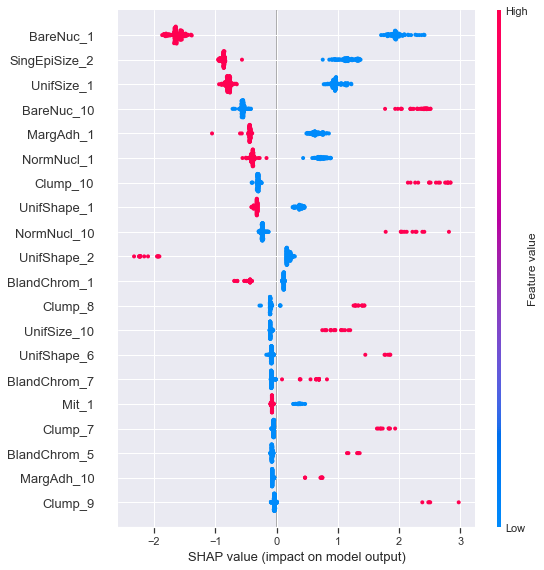

In [18]:
interpret_model(tuned_cat)

In [19]:
predict_model(tuned_cat)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.9238,0.9808,0.8889,0.8889,0.8889,0.8309


,Clump_1,Clump_10,Clump_2,Clump_3,Clump_4,Clump_5,Clump_6,Clump_7,Clump_8,Clump_9,...,Mit_2,Mit_3,Mit_4,Mit_5,Mit_6,Mit_7,Mit_8,Class,Label,Score
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0005
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0001
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9996
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0006
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0001
206,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9950
207,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0001
208,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0004
